In [83]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
from matplotlib import pyplot as plt
import matplotlib
import os
import imageio
%matplotlib inline
import bar_chart_race as bcr
from io import BytesIO
from lxml import etree
import base64
import webbrowser

# Motivation

**Data Sets:**
1. California Power Plants information:[Link](https://cecgis-caenergy.opendata.arcgis.com/datasets/CAEnergy::california-power-plants/about)
2. California Electrical Energy Generation:[Link](https://www.energy.ca.gov/data-reports/energy-almanac/california-electricity-data/california-electrical-energy-generation)

**The reason for choosing these data sets:**<br>
We would like to know if the electric energy offered to electric vehicles to operate is an environmentally friendly resource. Hence, we searched for electricity generation in California to determine whether electric cars are worth investing in for environmental protection in this region and continue to do this topic.

# California Electricity Generation

In [3]:
df = pd.read_html('California Electrical Energy Generation.html')
df2 = pd.read_csv('California_Power_Plants.csv')

In [4]:
df_totalGeneration_per_year = df[0]
df_totalGeneration_per_year

,Energy Categories,2011 GWh,2012 GWh,2013 GWh,2014 GWh,2015 GWh,2016 GWh,2017 GWh,2018 GWh,2019 GWh,2020 GWh
0,Total System Electric Generation,293775,302180,296259,296150,295930,290792,292083,285656,277933,272576
1,Total In-State Generation,201347,199645,199594,199503,196910,198466,206379,195008,200704,190913
2,Total CA Hydroelectric,42737,27461,24101,16482,13996,28986,43304,26344,38949,21414
3,CA Large Hydro,35682,22737,20319,13739,11569,24410,36920,22096,33145,17938
4,CA Small Hydro,7055,4724,3782,2742,2427,4576,6384,4248,5349,3476
5,CA Nuclear,36666,18491,17860,17027,18525,18931,17925,18268,16163,16280
6,CA Coal,2096,1262,824,802,309,324,302,294,250,317
7,CA Oil,36,48,38,45,54,37,33,35,36,30
8,CA Natural Gas,91063,121777,120863,121855,117565,98879,89588,90691,86134,92298
9,CA Geothermal,12685,12733,12510,12186,11994,11582,11745,11528,10967,11345


<br>**The visualization of electricity generation form different resources**

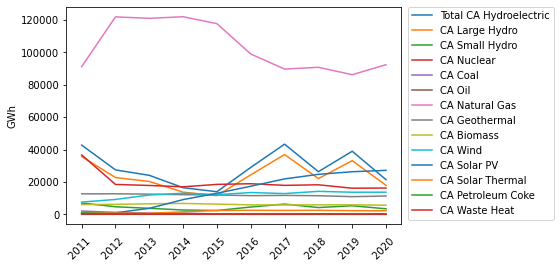

In [5]:
df_totalGeneration_per_year_woT = df_totalGeneration_per_year.drop([0,1,16])

df_totalGeneration_per_year_woT.reset_index(drop=True, inplace=True)

years = list(df_totalGeneration_per_year_woT.columns[1:])
years = [x.replace('GWh', '') for x in years]
X = np.arange(len(years))

for i in range(len(df_totalGeneration_per_year_woT)):
    plt.plot(X, list(df_totalGeneration_per_year_woT.iloc[i, 1:]), label = df_totalGeneration_per_year_woT['Energy Categories'][i])

plt.xticks(X, years, rotation= 45)
plt.ylabel('GWh')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<br>**Try to transfer to html page present**

True

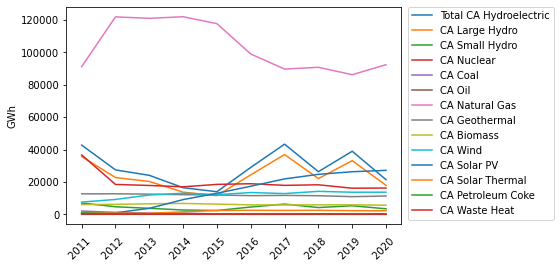

In [6]:
CA_pg_des = """<h1>CA Power Generation Describe Stastic</h1>""" + df_totalGeneration_per_year.describe().T.to_html()

# matplotlib plot a graph
df_totalGeneration_per_year_woT = df_totalGeneration_per_year.drop([0,1,16])
df_totalGeneration_per_year_woT.reset_index(drop=True, inplace=True)

years = list(df_totalGeneration_per_year_woT.columns[1:])
years = [x.replace('GWh', '') for x in years]
X = np.arange(len(years))

for i in range(len(df_totalGeneration_per_year_woT)):
    plt.plot(X, list(df_totalGeneration_per_year_woT.iloc[i, 1:]), label = df_totalGeneration_per_year_woT['Energy Categories'][i])

plt.xticks(X, years, rotation= 45)
plt.ylabel('GWh')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# figure store in bianary file
buffer = BytesIO()
plt.savefig(buffer)  
plot_data = buffer.getvalue()

# Trans to html format
imb = base64.b64encode(plot_data)   
ims = imb.decode()
imd = "data:image/png;base64,"+ims
CA_pg_im = """<h1>Colifornia Power Generation Categories in 2020 Figure</h1>  """ + """<img src="%s">""" % imd   

root = "<title>CA Power Generation Dataset</title>"
root = root + CA_pg_des + CA_pg_im  #Connect with multiple html formats

# Using etree from lxml to trans to html code 
html = etree.HTML(root)
tree = etree.ElementTree(html)
tree.write('CAPowerGeneration.html')

webbrowser.open('CAPowerGeneration.html',new = 1)

<br>**The electricity generation with various resource in 2020**

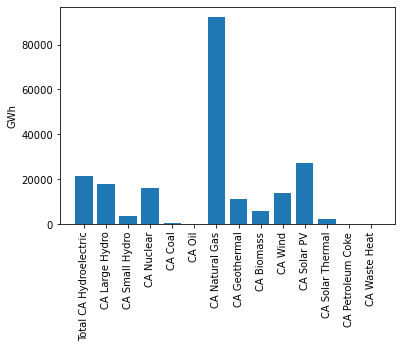

In [7]:
categories = list(df_totalGeneration_per_year_woT['Energy Categories'])
X = np.arange(len(categories))
height = df_totalGeneration_per_year_woT.iloc[:, 10]

# Create bars
plt.bar(X, height)

# Create names on the x-axis
plt.xticks(X, categories, rotation = 90)
plt.ylabel('GWh')

# Show graphic
plt.show()

# Generate Animation Bar Chart 

<br>**Electricity generation from different resource categories from 2011 to 2019**

In [9]:
n_frames = 10
bg_color = '#95A4AD'
bar_color = '#283F4E'
gif_name = 'California_power_generation_per_year'

#Making X
categories_f = list(df_totalGeneration_per_year_woT['Energy Categories'])
categories = [x.replace('CA', '') for x in categories]
x = np.arange(0, len(categories))
coordinates_lists = df_totalGeneration_per_year_woT


#Making coordinates_lists(Y)
l=(list(df_totalGeneration_per_year_woT.columns))
coordinates_lists = []
for i in range(1,len(l)):
    coordinates_lists.append(list(df_totalGeneration_per_year_woT[l[i]]))

#For Title 
years = list(df_totalGeneration_per_year_woT.columns[1:])
years = [x.replace('GWh', '') for x in years]
    

print('Generate Diagram\n')
filenames = []
for index in np.arange(0, len(coordinates_lists)-1):
    y = coordinates_lists[index]
    y1 = coordinates_lists[index + 1]
    y_path = np.array(y1) - np.array(y)
    for i in np.arange(0, n_frames + 1):
        y_temp = (y + (y_path / n_frames) * i)
        # Plot Bar Chart
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_facecolor(bg_color)
        plt.bar(x, y_temp, width=0.4, color=bar_color)
        plt.ylim(0, 130000)
        
        plt.xticks(x, categories,fontsize=8, rotation = 40)
        plt.ylabel('GWh')
        
        #Set theme
        plt.title(years[index], fontsize=50, fontweight='heavy', loc='right')
        plt.title("CA Power Plants\' Categories", fontsize=30, fontweight='heavy', loc='left', style="italic")
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
        
        filename = f'images/frame_{index}_{i}.png'
        filenames.append(filename)

        
        if (i == n_frames):
            for i in range(5):
                filenames.append(filename)
                
        plt.savefig(filename, dpi=96, facecolor=bg_color)
        plt.close()

print('Store Diagram\n')
# Generate GIF
print('Generate GIF\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('Save GIF\n')
print('Delete graphs\n')

for filename in set(filenames):
    os.remove(filename)
print('Complete!!')

Generate Diagram

Store Diagram

Generate GIF

Save GIF

Delete graphs

Complete!!


**After executing it, GIF has been store in your local, you could check it**

# The Number of Power Plants And Their Distribution

In [11]:
df3 = pd.read_csv('California_Power_Plants.csv')

In [12]:
df_PowerPlants = df3
df_PowerPlants

,X,Y,OBJECTID_1,CECPlantID,PlantName,EIAPlantID,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,...,State,Zip,Capacity_Latest,Units,PriEnergySource,LastReportedYear,Lon_WGS84,Lat_WGS84,Annual_Hyperlink,Monthly_Hyperlink
0,-1.357225e+07,4.636102e+06,1,B0001,Vaca Dixon Battery Storage,59256,0,1,0,0,...,CA,95688.0,2.4,Unit 1,BAT,2013.0,-121.921635,38.400098,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...
1,-1.317800e+07,4.180654e+06,2,B0002,Tehachapi Storage Project,59661,0,1,0,0,...,CA,93561.0,NaN,NaN,NaN,NaN,-118.380000,35.123334,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...
2,-1.355316e+07,4.482017e+06,3,B0003,Yerba Buena Battery,59257,0,1,0,0,...,CA,95121.0,NaN,NaN,NaN,NaN,-121.750114,37.307228,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...
3,-1.311703e+07,3.987387e+06,4,B0004,Millikan Avenue BESS,60760,0,1,0,0,...,CA,92606.0,NaN,NaN,NaN,NaN,-117.832291,33.691010,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...
4,-1.308668e+07,4.029427e+06,5,B0005,Mira Loma BESS A,60661,0,0,0,0,...,CA,91761.0,NaN,NaN,NaN,NaN,-117.559669,34.004651,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,-1.282858e+07,3.986529e+06,1847,S0712,Maverick Solar,61710,1,0,0,0,...,CA,92239.0,125.0,Unit 1,SUN,2020.0,-115.241102,33.684593,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...
1847,-1.282858e+07,3.986529e+06,1848,S0713,Maverick Solar 4,63732,1,0,0,0,...,CA,92239.0,100.0,Unit 1,SUN,2020.0,-115.241094,33.684592,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...
1848,-1.317192e+07,4.162328e+06,1849,S0714,Valentine Solar,62288,1,0,0,0,...,CA,93560.0,100.0,Unit 1,SUN,2020.0,-118.325386,34.988573,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...
1849,-1.348335e+07,4.628196e+06,1850,S0701,Rancho Seco Solar II,63387,1,0,0,0,...,CA,95638.0,160.0,RSS2,SUN,2020.0,-121.122971,38.344425,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...


In [14]:
data_power_plants = pd.read_csv('California_Power_Plants.csv')
data_power_plants.drop(['Annual_Hyperlink', 'Monthly_Hyperlink', 'State'], axis=1, inplace=True)
data_power_plants.dropna(subset=['Lon_WGS84', 'Lat_WGS84', 'PriEnergySource'], inplace=True)

data_power_plants

,X,Y,OBJECTID_1,CECPlantID,PlantName,EIAPlantID,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,...,Street,City,County,Zip,Capacity_Latest,Units,PriEnergySource,LastReportedYear,Lon_WGS84,Lat_WGS84
0,-1.357225e+07,4.636102e+06,1,B0001,Vaca Dixon Battery Storage,59256,0,1,0,0,...,5138 Midway Road,Vacaville,Solano,95688.0,2.4,Unit 1,BAT,2013.0,-121.921635,38.400098
6,-1.310625e+07,4.041469e+06,7,B0007,AltaGas Pomona Energy Storage,50300,0,0,0,0,...,N Towne Avenue,Pamona,San Bernardino,91767.0,20.0,Unit 1,BAT,2020.0,-117.735476,34.094284
7,-1.303719e+07,3.911829e+06,8,B0008,Escondido Energy Storage,60570,0,0,0,0,...,571 Enterprise Street,Vineyard,San Diego,92029.0,30.0,"Unit 1, Unit 2, Unit 3",BAT,2020.0,-117.115027,33.124413
8,-1.286185e+07,3.869159e+06,9,B0011,El Centro Generating Station BESS,389,0,0,0,0,...,485 E Villa Avenue,El Centro,Imperial,92243.0,29.7,Unit 1,BAT,2020.0,-115.539949,32.802805
10,-1.302151e+07,3.868148e+06,11,B0013,Eastern BESS 1,60569,0,1,0,0,...,904 W Main Street,El Cajon,San Diego,92020.0,7.5,BESS 1,BAT,2020.0,-116.974215,32.795171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,-1.282858e+07,3.986529e+06,1847,S0712,Maverick Solar,61710,1,0,0,0,...,29722 Corn Springs Rd,Desert Center,Riverside,92239.0,125.0,Unit 1,SUN,2020.0,-115.241102,33.684593
1847,-1.282858e+07,3.986529e+06,1848,S0713,Maverick Solar 4,63732,1,0,0,0,...,29722 Corn Springs Rd,Desert Center,Riverside,92239.0,100.0,Unit 1,SUN,2020.0,-115.241094,33.684592
1848,-1.317192e+07,4.162328e+06,1849,S0714,Valentine Solar,62288,1,0,0,0,...,11585 Tehachapi Willow Springs Rd,Rosamond,Kern,93560.0,100.0,Unit 1,SUN,2020.0,-118.325386,34.988573
1849,-1.348335e+07,4.628196e+06,1850,S0701,Rancho Seco Solar II,63387,1,0,0,0,...,14440 Twin Cities Road,Herald,Sacramento,95638.0,160.0,RSS2,SUN,2020.0,-121.122971,38.344425


<br>**Mean of all lontitude and latitude for preparing the folium.Map()'s zoom_start attributes**

In [15]:
data_power_plants_mLat = data_power_plants['Lat_WGS84'].mean()
data_power_plants_mLon = data_power_plants['Lon_WGS84'].mean()

print(data_power_plants_mLat)
print(data_power_plants_mLon)

36.087142273337314
-119.34787398694945


<br>**The distribution of different kind of power plants' resource**

In [84]:
map_hooray = folium.Map(location=[data_power_plants_mLat+1.5 , data_power_plants_mLon],
                    zoom_start = 6) # Uses lat then lon. The bigger the zoom number, the closer in you get

def check_categories(cat):
    if cat == 'AB':
        return '#cf6e48'
    elif cat == 'BAT':
        return '#9fcc23'
    elif cat == 'BIT':
        return '#52871e'
    elif cat == 'BLQ':
        return '#4d702b'
    elif cat == 'DFO':
        return '#8e5ebf'
    elif cat == 'DFO, NG':
        return '#b227d9'
    elif cat == 'GAS':
        return '#d92768'
    elif cat == 'GEO':
        return '#ed0eb9'
    elif cat == 'JF':
        return '#0ee2ed'
    elif cat == 'JF, NG':
        return '#0eedbd'
    elif cat == 'LFG':
        return '#6fed0e'
    elif cat == 'LFG, OBG':
        return '#0eed33'
    elif cat == 'MSW':
        return '#12ed0e'
    elif cat == 'NG':
        return '#ed0e25'
    elif cat == 'NG, BIT':
        return '#ed0e60'
    elif cat == 'NG, DFO':
        return '#ed0eb2'
    elif cat == 'NG, OG':
        return '#810eed'
    elif cat == 'NG, SUN':
        return '#edc40e'
    elif cat == 'NG, SUN, OBG':
        return '#b8b01c'
    elif cat == 'NUC':
        return '#eb726e'
    elif cat == 'OBG':
        return '#ebb36e'
    elif cat == 'OG':
        return '#eba06e'
    elif cat == 'OGW':
        return '#995325'
    elif cat == 'OIL':
        return '#574d47'
    elif cat == 'OIL, NG':
        return '#eb9d86'
    elif cat == 'PC':
        return '#70ad4c'
    elif cat == 'SUB':
        return '#c96f36'
    elif cat == 'SUN':
        return '#e3980e'
    elif cat == 'Sun':
        return '#e3980e'
    elif cat == 'WAT':
        return '#369bc9'
    elif cat == 'WDS':
        return '#23566e'
    elif cat == 'WH':
        return '#1276e0'
    elif cat == 'WND':
        return '#3186cc'


# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# Loop through the data and add each to the incidents feature group
for name, cat, lat, lng, in zip(data_power_plants['PlantName'], data_power_plants['PriEnergySource'], data_power_plants['Lat_WGS84'], data_power_plants['Lon_WGS84']):
    
    color = check_categories(cat)
    iframe = folium.IFrame('Name: ' + name + '<br>' + 'Categories:' + cat)
    popup = folium.Popup(iframe, min_width=300, max_width=500)
    
    incidents.add_child(
        
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=popup,
            color=False,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
            legend_name = 'Primary Energy Generation Resource'
        )
    )

map_hooray.add_child(incidents)
map_hooray.save('California_Power_Plants.html')
webbrowser.open('California_Power_Plants.html',new = 1)

True

**After executing it, it will popup in html file** 

In [17]:
map_hooray = folium.Map(location=[data_power_plants_mLat+1.5 , data_power_plants_mLon],
                    zoom_start = 6) # Uses lat then lon. The bigger the zoom number, the closer in you get

# List comprehension to make out list of lists
heat_data = [[row['Lat_WGS84'],row['Lon_WGS84']] for index, row in data_power_plants.iterrows()]

# Plot it on the map
HeatMap(heat_data, radius=13, blur=10).add_to(map_hooray)

# Display the map
map_hooray

<br>**The number of power plants differ from resource used in california**

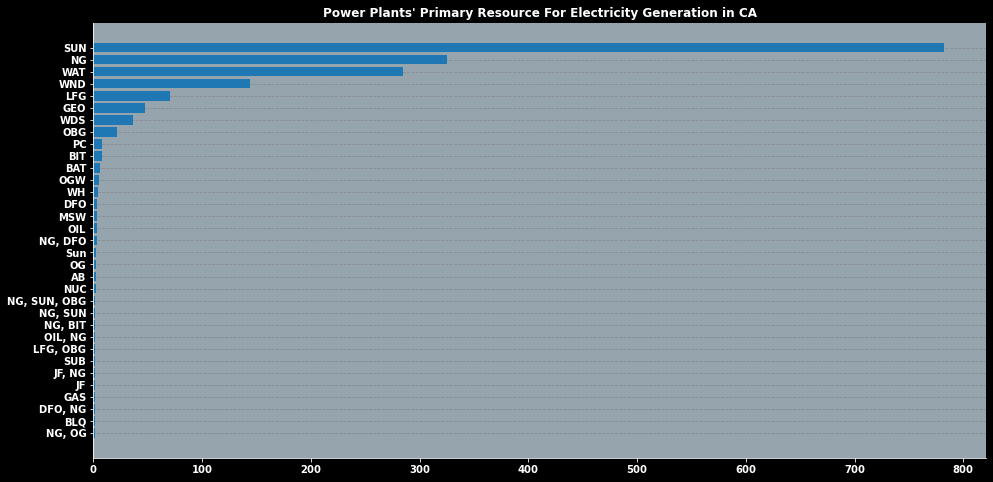

In [85]:
dpp = data_power_plants.groupby(['PriEnergySource']).size()
dpp_s = dpp.sort_values(ascending = False)

categories = list(dpp_s.index)
X = np.arange(len(categories))
height = dpp_s

bg_color = '#95A4AD'
bar_color = '#1f77b4'

matplotlib.rc('font', family='Poppins', weight='bold')

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_facecolor(bg_color)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('Power Plants\' Primary Resource For Electricity Generation in CA', fontweight='heavy', color='white')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

plt.barh(range(len(height)), height, tick_label=categories, color=bar_color)
plt.gca().invert_yaxis()
plt.gcf().set_facecolor('black')

plt.savefig('PowerPlantsPrimaryResorces_transparent.png', bbox_inches='tight', transparent=True)
plt.show()

<br>**The distribution of 6 primary kind of power plants' resource**

In [86]:
map_hooray = folium.Map(location=[data_power_plants_mLat+1.5 , data_power_plants_mLon],
                    zoom_start = 6) # Uses lat then lon. The bigger the zoom number, the closer in you get

def check_categories(cat):
    if cat == 'SUN':
        return '#e3980e'
    elif cat == 'NG':
        return '#c911d6'
    elif cat == 'WAT':
        return '#1160d6'
    elif cat == 'WND':
        return '#0cdaed'
    elif cat == 'LFG':
        return '#2c8716'
    elif cat == 'GEO':
        return '#db2109'
    else:
        return 'grey'
    

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# Loop through the data and add each to the incidents feature group
for name, cat, lat, lng, in zip(data_power_plants['PlantName'], data_power_plants['PriEnergySource'], data_power_plants['Lat_WGS84'], data_power_plants['Lon_WGS84']):
    
    color = check_categories(cat)
    iframe = folium.IFrame('Name: ' + name + '<br>' + 'Categories:' + cat)
    popup = folium.Popup(iframe, min_width=300, max_width=500)
    
    incidents.add_child(
        
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=popup,
            color=False,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
        )
    )

map_hooray.add_child(incidents)
folium.LayerControl().add_to(map_hooray)
map_hooray.save('California_Power_Plants_Pri.html')
webbrowser.open('California_Power_Plants_Pri.html',new = 1)

True

**After executing it, it will popup in html file** 